# N-Body Problem and Symplectic Integrators
> Author: Gil Miranda Neto<br>
> Contact: gilsmneto@gmail.com<br>
> Repo: [@mirandagil](https://github.com/mirandagil/university-courses/analise-numerica-edo-2019-1/project)<br>
   
`last update: 30/05/2019`

---

In [1]:
import time
import numpy as np

## --- Body class
from local_body import *

## --- Functions to simulate and plot
import local_functions as sim

### Initializing the celestial bodies
#### Setting Initial Values

In [2]:
sun = Body('Sun', 'yellow')
sun.mass = 1.98855e30
sun.size = 20

earth = Body('Earth', 'darkblue')
earth.mass = 5.9742e24
earth.p_x0 = 147.1e9
earth.v_y0 = 30.29e3
earth.size = 1
earth.angle = 1.57 * np.pi/180
earth.p_z0 = sin(earth.angle)*earth.p_x0

venus = Body('Venus', 'salmon')
venus.mass = 4.8685e24
venus.p_x0 = 107.5e9
venus.v_y0 = -35.26e3
venus.angle = 2.19 * np.pi/180
venus.p_z0 = sin(venus.angle)*venus.p_x0
venus.size = 0.95
    
mercury = Body('Mercury', 'darkmagenta')
mercury.mass = 0.3e24
mercury.p_x0 = 46e9
mercury.v_y0 = 58.98e3
mercury.size = 0.38
mercury.angle = 3 * np.pi/180
mercury.p_z0 = sin(mercury.angle)*mercury.p_x0

mars = Body('Mars', 'r')
mars.mass = 0.642e24
mars.p_x0 = 206.6e9
mars.v_y0 = 26.5e3
mars.size = 0.53
mars.angle = 1.67 * np.pi/180
mars.p_z0 = sin(mars.angle)*mars.p_x0
    
jupiter = Body('Jupiter', 'orangered')
jupiter.mass = 1.898e27
jupiter.p_x0 = 740.5e9
jupiter.v_y0 = 13.72e3
jupiter.size = 11.2
jupiter.angle = 1 * np.pi/180
jupiter.p_z0 = sin(jupiter.angle)*jupiter.p_x0

saturn = Body('Saturn', 'maroon')
saturn.mass = 5.68e26
saturn.p_x0 = 1352.6e9
saturn.v_y0 = 10.18e3
saturn.size = 9.45
saturn.angle = 0.93 * np.pi / 180
saturn.p_z0 = sin(saturn.angle)*saturn.p_x0
    
uranus = Body('Uranus', 'darkgreen')
uranus.mass = 8.6e25
uranus.p_x0 = 2741.3e9
uranus.v_y0 = 7.11e3
uranus.size = 4
uranus.angle = 1.02 * np.pi/180
uranus.p_z0 = sin(uranus.angle)*uranus.p_x0

neptune = Body('Neptune', 'navy')
neptune.mass = 1.02e26
neptune.p_x0 = 4444.5e9
neptune.v_y0 = 5.5e3
neptune.size = 3.8
neptune.angle = 0.72 * np.pi/180    
neptune.p_z0 = sin(neptune.angle)*neptune.p_x0


pluto = Body('Pluto', 'magenta')
pluto.mass = 0.0146e24
pluto.p_x0 = 4436.8e9
pluto.v_y0 = 6.10e3
pluto.angle = 15.55 * np.pi/180
pluto.p_z0 = sin(pluto.angle)*pluto.p_x0

---
### List with bodies object

Separated in: Full solar system, Inner Solar System, Inner + Jupiter, Outter Solar System

In [8]:
bodies = [sun, mercury, venus, earth, mars, jupiter, saturn, neptune]
bodies_jp = [sun, earth, venus, mars, mercury, jupiter]
bodies_inner = [sun, earth, venus, mars, mercury]
bodies_outter = [sun, jupiter, saturn, uranus, neptune]

bodies_test = bodies_inner#[sun, mercury, venus, earth, mars, jupiter, ]

---
### Setting List with the timesteps and methods to simulate

In [9]:
hs = [3600*24]
m = ['euler-cromer']
period = 10000

### Running Simulation #1

In [10]:
tic = time.time()

In [11]:
pos, vel, pot, ang_mo = sim.big_simulation(methods = m, t = period, steps = hs, bod = bodies_test)

### Plotting Inner Orbits

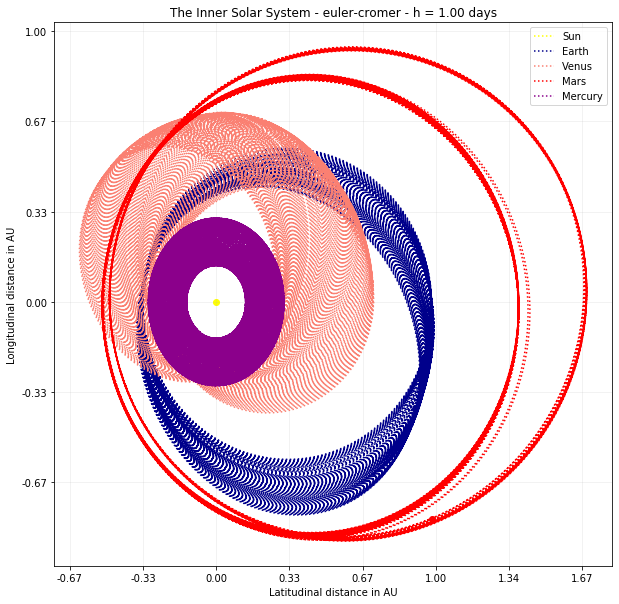

In [12]:
sim.big_plotter(methods = m, steps = hs, graph = ['orbit'], opt = [bodies_test, 'The Inner Solar System'], pos_vec = pos)
#sim.orbit_plotter3D(pos, bodies)

In [30]:
toc = time.time()
print(toc - tic)

8.657063007354736


In [26]:
momentum_p = sim.momentum_calc(bodies, methods = m, hs = hs, vel_vec = vel, t = period)
potential_u = sim.potential_calc(bodies, methods = m, hs = hs, pot_vec = pot, t = period)
angular_m = sim.ang_mo_calc(bodies, methods = m, hs = hs, mo_vec = ang_mo, t = period)

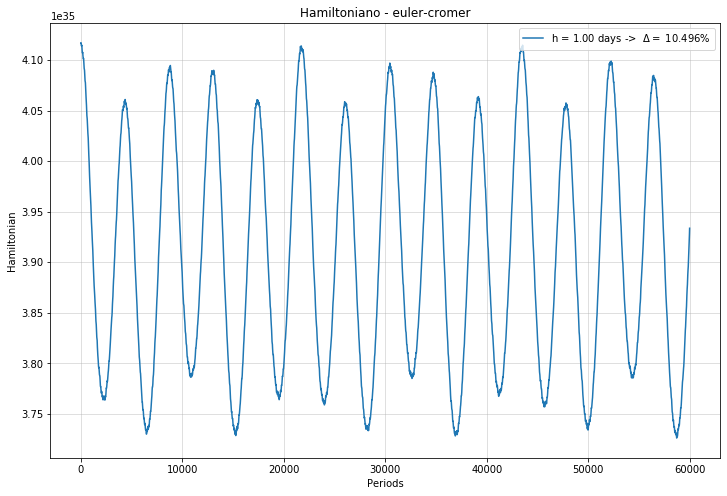

In [27]:
sim.big_plotter(methods = m, t = period, steps = hs, graph = ['hamilton'], opt = [bodies, 'The Inner Solar System'], pos_vec = pos, p_vec = potential_u, u_vec = momentum_p)

In [30]:
%pylab
sim.big_plotter(methods = m, t = period, steps = hs, graph = ['momentum'], opt = [bodies, 'The Inner Solar System'], pos_vec = pos, ang_vec = angular_m)

Using matplotlib backend: GTK3Agg
Populating the interactive namespace from numpy and matplotlib


/usr/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['cos', 'sqrt', 'sin']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [29]:
angular_m

{'euler-cromer': [(0,
   array([1.03764005e+44, 1.03764005e+44, 1.03764005e+44, ...,
          1.03764005e+44, 1.03764005e+44, 1.03764005e+44]))]}

In [99]:
def calc_aphelion(pos):
    aphelion = 0
    for i in pos:
        dist = np.sqrt(i[0]**2+i[1]**2 + i[2]**2)
        if dist > aphelion: aphelion = dist
    return aphelion

def calc_perihelion(pos):
    pherihelion = 50*152e9
    for i in pos:
        dist = np.sqrt(i[0]**2+i[1]**2+i[2]**2)
        if dist < pherihelion: pherihelion = dist
    return pherihelion

def calc_ecc(ap, pe):
    e = 1-(2/((ap/pe)+1))
    return e

aphelion = {}
perihelion = {}

for b in bodies_test[1:]:
    #aphelion[b.name] = calc_aphelion(pos['velocity-verlet'][0][1][b.name])
    #perihelion[b.name] = calc_perihelion(pos['velocity-verlet'][0][1][b.name])
    aphelion[b.name] = calc_aphelion(pos['leapfrog'][0][1][b.name])
    perihelion[b.name] = calc_perihelion(pos['leapfrog'][0][1][b.name])
    
eccentricity = {}
data = {}
data['eccentricity'] = {'Mercury': 0.205, 'Venus': 0.007, 'Earth': 0.017, 'Mars':0.094, 'Jupiter': 0.049, 'Saturn': 0.057, 'Neptune': 0.011}
for b in bodies_test[1:]:
    eccentricity[b.name] = calc_ecc(aphelion[b.name], perihelion[b.name])

In [100]:
eccentricity

{'Mercury': 0.20733040592680407,
 'Venus': 0.007783010773661503,
 'Earth': 0.01724546920413761,
 'Mars': 0.09357385663185824,
 'Jupiter': 0.05058657018445778,
 'Saturn': 0.058340105864479797,
 'Neptune': 0.011691931391754617}

In [101]:
data['eccentricity']

{'Mercury': 0.205,
 'Venus': 0.007,
 'Earth': 0.017,
 'Mars': 0.094,
 'Jupiter': 0.049,
 'Saturn': 0.057,
 'Neptune': 0.011}

In [ ]:
for b in bodies_test[1:]:
    print(b.name + ': ' + str((data['eccentricity'][b.name]/eccentricity[b.name])))

In [ ]:
eccentricity

ValueError: operands could not be broadcast together with remapped shapes [original->remapped]: (0,) and requested shape (1000,)

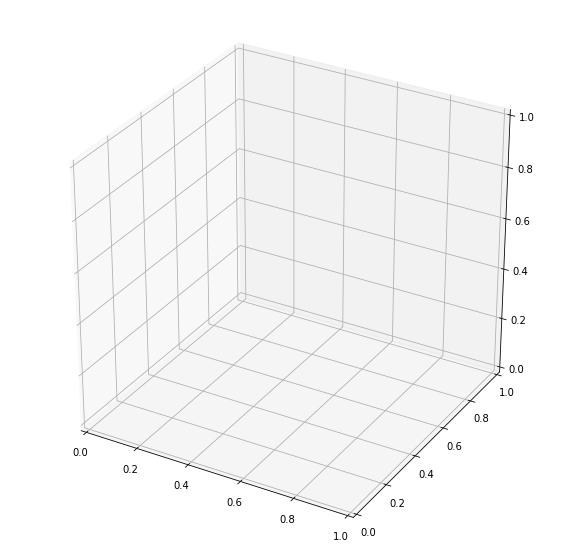

In [46]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
#ax.scatter3D(mercury.p_x0,mercury.p_y0,mercury.p_z0)
ax.plot3D(mercury.pos_x, mercury.pos_y, mercury.pos_z,  label = mercury.name)
ax.plot3D(earth.pos_x, earth.pos_y, earth.pos_z,  label = earth.name)
ax.plot3D(venus.pos_x, venus.pos_y, venus.pos_z,  label = venus.name)
ax.plot3D(mars.pos_x, mars.pos_y, mars.pos_z,  label = mars.name)
#ax.plot3D(halley.pos_x, halley.pos_y, halley.pos_z,  label = halley.name)
#ax.plot3D(pluto.pos_x, pluto.pos_y, pluto.pos_z,  label = pluto.name)
#ax.plot3D(neptune.pos_x, neptune.pos_y, neptune.pos_z,  label = neptune.name)
#ax.plot3D(saturn.pos_x, saturn.pos_y, saturn.pos_z,  label = saturn.name)
#ax.plot3D(uranus.pos_x, uranus.pos_y, uranus.pos_z,  label = uranus.name)

ax.scatter3D(0,0,0)
ax.view_init(azim = 55)
plt.legend()
plt.show()

### Plotting Outer Orbits

In [9]:
sim.big_plotter(methods = m, steps = hs, graph = ['orbit'], opt = [bodies, 'The Inner Solar System'], pos_vec = pos)

In [12]:
end = time.time()

In [13]:
print("A simulação levou %f segundos" % (end - start))

A simulação levou 181.901056 segundos


In [14]:
24000/60

400.0

In [80]:
sun = Body('Sun', 'black')
sun.mass = 1
sun.p_x0 = 1.38
sun.p_y0 = 0
sun.v_x0 = 0
sun.v_y0 = 0.584


planet = Body('Planet', 'purple')
planet.mass = 1
planet.p_x0 = 0
planet.p_y0 = 0.15
planet.v_x0 = 1.87
planet.v_y0 = 0.01

planet2 = Body('Planet 2', 'red')
planet2.mass = 1
planet2.p_x0 = -1.38
planet2.p_y0 = 0
planet2.v_x0 = 0
planet2.v_y0 = -0.584

planet2 = Body('Planet 3', 'red')
planet2.mass = 1
planet2.p_x0 = 0
planet2.p_y0 = -0.15
planet2.v_x0 = -1.87
planet2.v_y0 = 0

hs = [0.0025]
period = 30000

In [81]:
pos, vel, pot, ang_mo = sim.big_simulation(methods = ['leapfrog'], t = period, steps = hs, bod = [sun, planet, planet2])

In [82]:
pos, _, _, _ = sim.simulate([sun, planet, planet2], step = hs[0], period = period, method = 'leapfrog', G = 0.01)

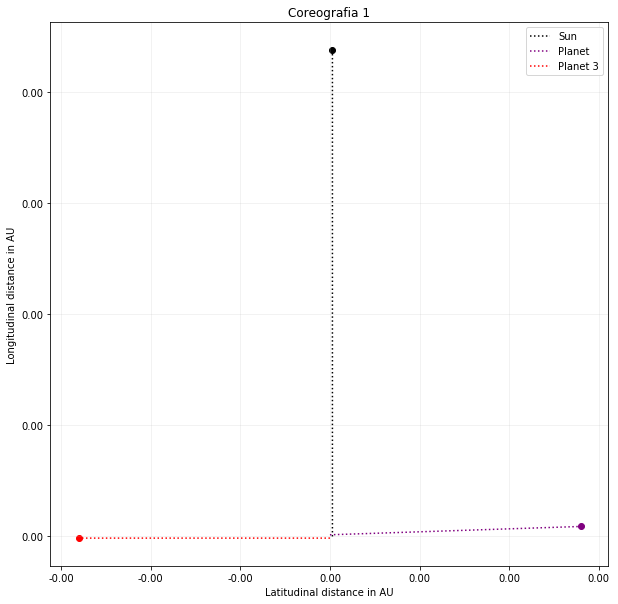

In [83]:
sim.orbit_plotter(pos, [sun, planet, planet2], title = 'Coreografia 1', scale = False, color = False)

In [18]:
hs = [7200]
m = ['euler', 'leapfrog']
period = 10000
bodies = [sun, earth, venus, mars]

In [19]:
pos, vel, pot, ang_mo = sim.big_simulation(methods = m, t = period, steps = hs, bod = bodies)

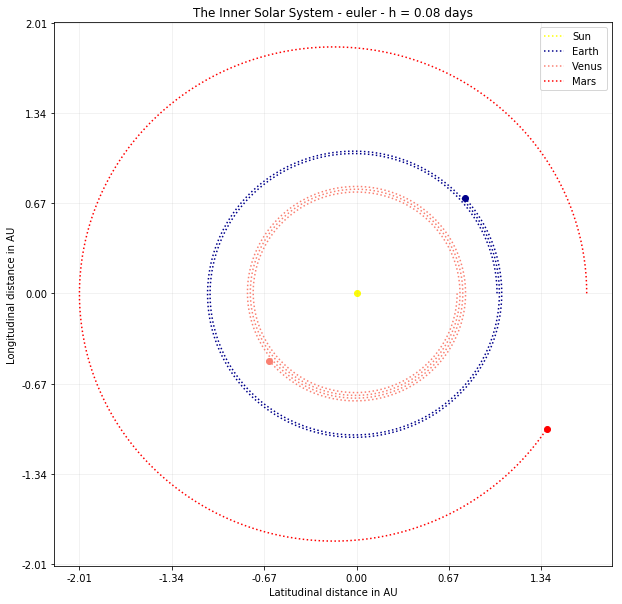

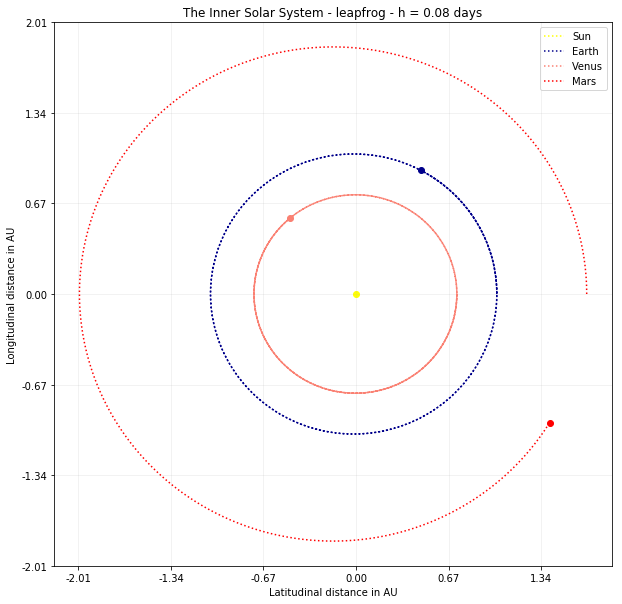

In [20]:
sim.big_plotter(methods = m, steps = hs, graph = ['orbit'], opt = [bodies, 'The Inner Solar System'], pos_vec = pos)